### REMOVING Duplicates from minuteSleep_merged.csv

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [ ]:
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\minuteSleep_merged.csv')

print(df)


duplicates = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicates)
print("Number of Duplicates: ", len(duplicates))

In [53]:
# Confirming 188521 rows, 543 duplicates, so 188521-543 = 187978 which is how many rows we end up with after removing dupes
df = df.drop_duplicates()
print(df)

                Id                  date  value        logId
0       1503960366  4/12/2016 2:47:30 AM      3  11380564589
1       1503960366  4/12/2016 2:48:30 AM      2  11380564589
2       1503960366  4/12/2016 2:49:30 AM      1  11380564589
3       1503960366  4/12/2016 2:50:30 AM      1  11380564589
4       1503960366  4/12/2016 2:51:30 AM      1  11380564589
...            ...                   ...    ...          ...
188516  8792009665   5/4/2016 9:59:00 AM      1  11552534115
188517  8792009665  5/4/2016 10:00:00 AM      1  11552534115
188518  8792009665  5/4/2016 10:01:00 AM      1  11552534115
188519  8792009665  5/4/2016 10:02:00 AM      1  11552534115
188520  8792009665  5/4/2016 10:03:00 AM      1  11552534115

[187978 rows x 4 columns]


In [54]:
# Saving result to csv file named: "minuteSleep_merged_cleaned.csv"

folder_path = r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit'
file_name = 'minuteSleep_merged_cleaned.csv'
file_path = folder_path + '\\' + file_name

df.to_csv(file_path, index=False)


# REMOVING Duplicates from sleepDay_merged.csv

In [55]:
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\sleepDay_merged.csv')

print(df)


duplicates = df[df.duplicated()]
print("Duplicated Rows:")
print(duplicates)
print("Number of Duplicates: ", len(duplicates))

             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0    

In [56]:
# Confirming 413 rows, 3 duplicates, so 413-3 = 410 which is how many rows we end up with after removing dupes
df = df.drop_duplicates()
print(df)

             Id               SleepDay  TotalSleepRecords  TotalMinutesAsleep  \
0    1503960366  4/12/2016 12:00:00 AM                  1                 327   
1    1503960366  4/13/2016 12:00:00 AM                  2                 384   
2    1503960366  4/15/2016 12:00:00 AM                  1                 412   
3    1503960366  4/16/2016 12:00:00 AM                  2                 340   
4    1503960366  4/17/2016 12:00:00 AM                  1                 700   
..          ...                    ...                ...                 ...   
408  8792009665  4/30/2016 12:00:00 AM                  1                 343   
409  8792009665   5/1/2016 12:00:00 AM                  1                 503   
410  8792009665   5/2/2016 12:00:00 AM                  1                 415   
411  8792009665   5/3/2016 12:00:00 AM                  1                 516   
412  8792009665   5/4/2016 12:00:00 AM                  1                 439   

     TotalTimeInBed  
0    

In [57]:
# Saving result to csv named: "sleepDay_merged_cleaned.csv"

folder_path = r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit'
file_name = 'sleepDay_merged_cleaned.csv'
file_path = folder_path + '\\' + file_name

df.to_csv(file_path, index=False)


# Visualizations

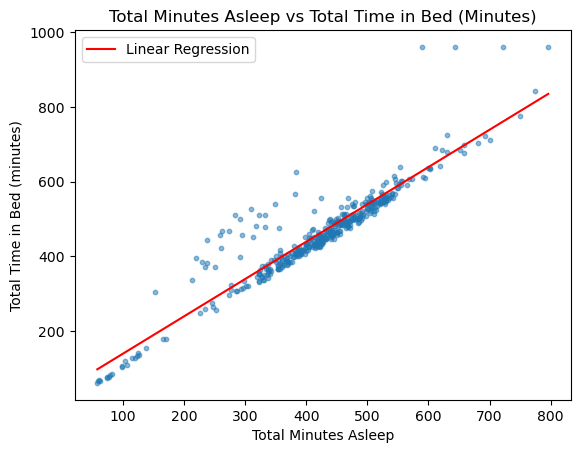

In [149]:
# Read data from CSV file
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\sleepDay_merged_cleaned.csv')

# Create a scatter plot
plt.scatter(df['TotalMinutesAsleep'], df['TotalTimeInBed'], s=10, alpha=0.5)


# Add a linear regression line
coefficients = np.polyfit(df['TotalMinutesAsleep'], df['TotalTimeInBed'], 1)
poly = np.poly1d(coefficients)
new_x = np.linspace(df['TotalMinutesAsleep'].min(), df['TotalMinutesAsleep'].max())
new_y = poly(new_x)
plt.plot(new_x, new_y, 'r-', label='Linear Regression')

# Add labels and title
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Time in Bed (minutes)')
plt.legend()
plt.title('Total Minutes Asleep vs Total Time in Bed (Minutes)')

# Show the plot
plt.show()

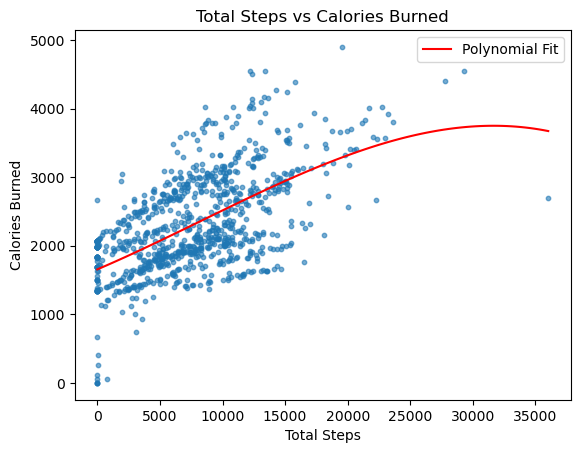

In [165]:
# Read data from CSV file
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\calculations\daily_steps_join_daily_calories.csv')

# Extract data from the dataframe
x = np.array(df['StepTotal'])
y = np.array(df['Calories'])

# Create a scatter plot
plt.scatter(x, y, s=10, alpha=0.6)

# Fit a polynomial curve
degree = 3  # Adjust the degree as needed
coeffs = np.polyfit(x, y, degree)
poly = np.poly1d(coeffs)

# Create a range of x-values for the curve
x_curve = np.linspace(min(x), max(x), 100)
y_curve = poly(x_curve)

# Plot the curve
line, = plt.plot(x_curve, y_curve, 'r-', label='Polynomial Fit')

# Add labels and title
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Total Steps vs Calories Burned')

# Add legend
plt.legend(handles=[line])  # Pass the line object, not the NumPy array

# Show the plot
plt.show()

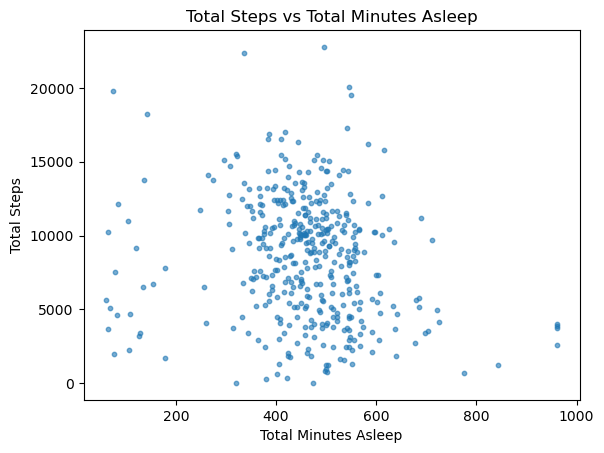

In [153]:
# Read data from CSV file
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\calculations\daily_activity_join_sleep_day.csv')

# Extract the relevant columns
x = df['TotalTimeInBed']
y = df['TotalSteps']

# Create the scatter plot
plt.scatter(x, y, s=10, alpha=0.6)

# Add labels and title
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Steps')
plt.title('Total Steps vs Total Minutes Asleep')

# Show the plot
plt.show()

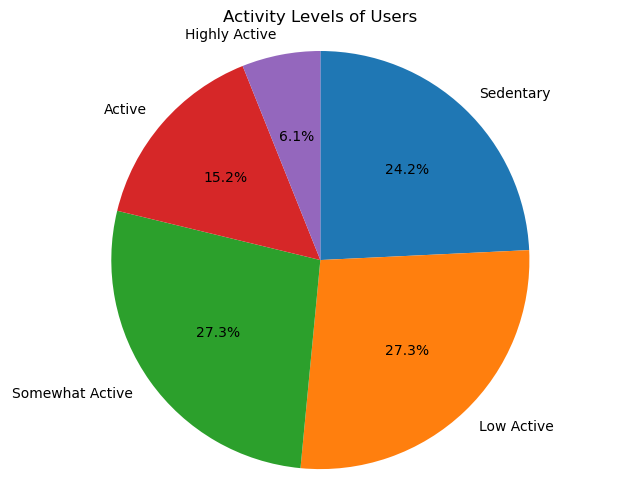

In [162]:
# Read data from CSV file
df = pd.read_csv(r'C:\ProgramData\MySQL\MySQL Server 8.0\Data\fitbit\calculations\average_steps_for_users_with_classification.csv')

# Define the desired order of categories
categories = ['Sedentary', 'Low Active', 'Somewhat Active', 'Active', 'Highly Active']

# Convert the 'Activity Level' column to categorical data type with the desired order
df['Activity Level'] = pd.Categorical(df['Activity Level'], categories=categories, ordered=True)

# Count the occurrences of each activity level
activity_counts = df['Activity Level'].value_counts()

# Sort the activity counts based on the desired order
activity_counts = activity_counts.reindex(categories)

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle
ax.set_title('Activity Levels of Users')

# Show the plot
plt.show()

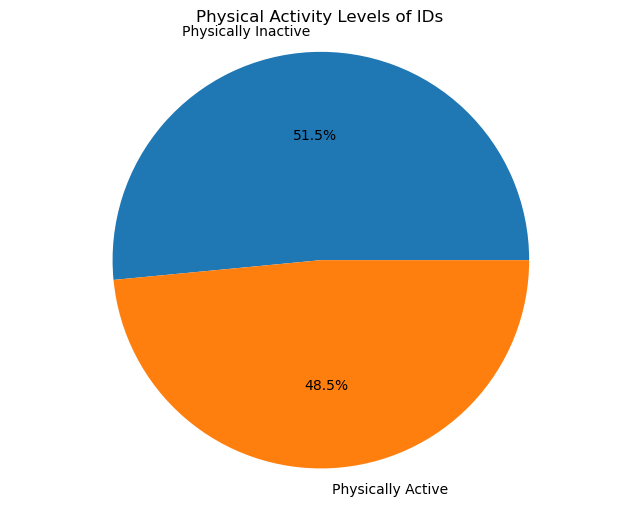

In [164]:
# Define the categories to group
inactive_categories = ['Sedentary', 'Low Active']
active_categories = ['Somewhat Active', 'Active', 'Highly Active']

# Create a new column 'Activity Group' based on the grouping
df['Activity Group'] = np.where(df['Activity Level'].isin(inactive_categories), 'Physically Inactive', 'Physically Active')

# Count the occurrences of each activity group
activity_group_counts = df['Activity Group'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(activity_group_counts, labels=activity_group_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle
ax.set_title('Physical Activity Levels of IDs')

plt.show()